In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_Prices = pd.read_csv("./train.csv")
df_Prices.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [89]:
df_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [90]:
def region_fc(df, list_gen, list_reduce, title):
    for item in list_gen:
        if item in list_reduce:
            df.loc[df['state']==item, "Region"]=title

In [91]:
def plot_cat_by_serie(category,region,densite_label,df,series,col1=None,col2=None,col3=None):
    serie=[]
    serie = series.copy()
    if col1!=None:
        serie.append(col1)
    if col2!=None:
        serie.append(col2)
    if col3!=None:
        serie.append(col3)
    #ax=(f'ax{i}' for i in range(len(serie)))
    cols=len(serie)
    rows=len(serie)//cols
    fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(25, 5))
    plt.suptitle(f'Repartion de la densité {densite_label} {category}  dans {region}  par ville dans chaque état ', fontsize=12)
    for cat,a in zip(serie, ax):
        df_cat = df[cat]
        a.pie(df_cat.value_counts(),labels=df_cat.value_counts().index)
        a.set_title(f"{cat}")
    plt.show()
    

# Nettoyage de données et préparation du dataset
' le dataset doit être préparé, de nombreux NaN et des valeurs non numériques doivent soit être enlevées soit être transformées en valeurs numériques (on utilisera get_dummies)'

In [92]:
df_Prices['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [93]:
df_Prices['MSZoning'].describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

In [94]:
list_col_obj=[]
for a in df_Prices.columns:
    if (df_Prices[a].dtypes != 'int64') and  (df_Prices[a].dtypes != 'float64') :
        list_col_obj.append(a)

len(list_col_obj)

43

In [95]:
def desc_object(list_col):
    for col in list_col:
        print(df_Prices[col].describe())

In [96]:
def desc_selec(list_col):
    list_a=[]
    for col in list_col:
        if df_Prices[col].describe()[1] <7:
            list_a.append(col)
    return list_a

In [97]:
desc_object(list_col_obj)

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object
count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object
count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object
count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object
count     1460
unique       8
top       Norm
freq      1445
Name: Conditi

## Selection des colonnes
les colonnes descriptives ayant un nombre de categorie inférieures à 7 sont éligibles si elles ne dépendent d'autres colonnes aux nombrex plus élevés de catégories

In [98]:
a=desc_selec(list_col_obj)

In [99]:
a

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleCondition']

In [100]:
df_obj = df_Prices[a]

In [101]:
df_obj.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   BldgType       1460 non-null   object
 9   RoofStyle      1460 non-null   object
 10  MasVnrType     588 non-null    object
 11  ExterQual      1460 non-null   object
 12  ExterCond      1460 non-null   object
 13  Foundation     1460 non-null   object
 14  BsmtQual       1423 non-null   object
 15  BsmtCond       1423 non-null   object
 16  BsmtExposure   1422 non-null   object
 17  BsmtFinType1   1423 non-null   object
 18  BsmtFinType2   1422 non-null

In [102]:
df_obj = pd.get_dummies(df_obj, dtype=int)

In [103]:
df_obj

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [227]:
df_exploit = df_Prices.select_dtypes(exclude=['object'])

In [228]:
df_exploit

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [229]:
df_exploit=pd.concat([df_exploit,df_obj], axis=1).reset_index()

In [230]:
df_exploit

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,0,0,0,0,0,0,0,1,0
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,0,0,0,0,0,0,0,1,0
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,62.0,7917,6,5,1999,2000,0.0,...,0,0,0,0,0,0,0,0,1,0
1456,1456,1457,20,85.0,13175,6,6,1978,1988,119.0,...,0,0,0,0,0,0,0,0,1,0
1457,1457,1458,70,66.0,9042,7,9,1941,2006,0.0,...,0,0,1,0,0,0,0,0,1,0
1458,1458,1459,20,68.0,9717,5,6,1950,1996,0.0,...,0,0,0,0,0,0,0,0,1,0


In [231]:
df_exploit = df_exploit.dropna(axis=1)

# Resolution par lasso puis ridge sklearn

In [158]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [248]:

features = df_exploit.drop(['SalePrice'],axis=1)
target = df_exploit['SalePrice']

In [249]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

In [250]:
sc = StandardScaler()

In [251]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [258]:
#X_train_reshape=X_train_scaled.reshape(-1,1)
#X_test_reshape=X_test_scaled.reshape(-1,1)
y_train_reshape=y_train.values.reshape(-1,1)
y_test_reshape = y_test.values.reshape(-1,1)

In [271]:
y_train_scaled =sc.fit_transform(y_train_reshape)

In [272]:
y_test_scaled = sc.transform((y_test_reshape))

### Traitement de y_train et y_test pour calcul de RMSE

In [273]:

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train_scaled,y_train_scaled)
print(clf.coef_)
print(clf.intercept_)

[-0.         -0.         -0.          0.          0.2936612   0.
  0.03227218  0.0216968   0.04063995  0.         -0.          0.07382708
  0.          0.         -0.          0.27519016  0.         -0.
  0.          0.          0.         -0.          0.          0.01400961
  0.07924036  0.02036835  0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.00344106 -0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.         -0.00560187  0.         -0.          0.         -0.
  0.         -0.         -0.          0.         -0.         -0.
 -0.     

In [274]:
clf.coef_

array([-0.        , -0.        , -0.        ,  0.        ,  0.2936612 ,
        0.        ,  0.03227218,  0.0216968 ,  0.04063995,  0.        ,
       -0.        ,  0.07382708,  0.        ,  0.        , -0.        ,
        0.27519016,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.01400961,  0.07924036,
        0.02036835,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.00344106,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.  

In [275]:
clf.intercept_

array([2.69314477e-17])

In [276]:
y_pred = clf.predict(X_test_scaled)

In [278]:
clf.score(X_test_scaled, y_test_scaled, sample_weight=None)

0.7817019966905858

In [279]:
mean_squared_error(y_test_scaled, y_pred, squared=False)

0.4292137857707172

In [280]:
clf2= linear_model.Ridge(alpha=0.1)
clf2.fit(X_train_scaled,y_train_scaled)

Ridge(alpha=0.1)

In [281]:
y_pred = clf2.predict(X_test_scaled)


In [282]:
clf2.score(X_test_scaled, y_test_scaled, sample_weight=None)


0.6706297747038927

In [284]:
mean_squared_error(y_test_scaled, y_pred)

0.27795974105203425

In [285]:
clf3 = linear_model.LassoCV(cv=10)
clf3.fit(X_train_scaled, y_train_scaled)

/home/blackswan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/blackswan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33680092740246437, tolerance: 0.10958659635232187
  model = cd_fast.enet_coordinate_descent_gram(
/home/blackswan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2085607404405323, tolerance: 0.10417194331810156
  model = cd_fast.enet_coordinate_descent_gram(
/home/blackswan/anaconda3/lib/python3.11/site-packages/sklearn/linear_m

LassoCV(cv=10)

In [287]:
clf3.score(X_test_scaled, y_test_scaled)

0.428166491836777

In [288]:
y_pred = clf3.predict(X_test_scaled)
y_test=y_test.reset_index(drop='index')

In [289]:
mean_squared_error(y_test_scaled, y_pred)

0.4825776030939986

In [291]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

print("R2 score : %.2f" % r2_score(y_test_scaled,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test_scaled,y_pred, squared=False))
er = []
g = 0
for i in range(len(y_test)):
    print( "actual=", y_test_scaled[i], " observed=", y_pred[i])
    x = (y_test_scaled[i] - y_pred[i]) **2
    er.append(x)
    g = g + x
    x = 0
for i in range(len(er)):
    x = x + er[i]
    print ("MSE", x / len(er))
    v = np.var(er)
    print ("variance", v)
    print ("average of errors ", np.mean(er))
    m = np.mean(y_test_scaled)
    print ("average of observed values", m)
    y = 0
for i in range(len(y_test)):
    y = y + ((y_test_scaled[i] - m) ** 2)
print ("total sum of squares", y)
print ("ẗotal sum of residuals ", g)
print ("r2 calculated", 1 - (g / y))

R2 score : 0.43
Mean squared error: 0.69
actual= [0.29093685]  observed= 0.40813820386659677
actual= [2.02629002]  observed= 2.2912433655918814
actual= [-0.09455946]  observed= -0.0415556183351848
actual= [-1.09114799]  observed= -1.5761017883020756
actual= [1.04581548]  observed= 0.9127651329024498
actual= [0.37770451]  observed= 0.7019910236380453
actual= [0.48926293]  observed= 0.4465456969884345
actual= [-0.98578726]  observed= -0.970318853707374
actual= [1.34454413]  observed= 1.2537474047489707
actual= [-0.51476283]  observed= -0.24227481138345894
actual= [-0.45278593]  observed= -0.7464072019095718
actual= [-0.27305293]  observed= -0.38510707901767055
actual= [-0.51476283]  observed= -0.5802807712862285
actual= [-0.40320442]  observed= -0.6163901250486005
actual= [0.69998438]  observed= 0.9635578662641577
actual= [1.18960188]  observed= 1.6015105114739516
actual= [-0.09331992]  observed= -0.027168316228878664
actual= [0.2599484]  observed= 0.1381303054458731
actual= [-0.63871663

In [212]:
import xgboost as xgb

clf4=xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,
                 objective='reg:linear', gamma=0, min_child_weight=1,
                 max_delta_step=0, subsample=1, colsample_bytree=1,
                 seed=0, missing=1)

In [292]:
clf4.fit(X_train_scaled, y_train_scaled)

/home/blackswan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [20:11:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/home/blackswan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [20:11:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=1,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, objective='reg:linear', ...)

In [293]:
clf4.score(X_test_scaled,y_test_scaled)

0.8749679934480005

In [294]:
y_pred =clf4.predict(X_test_scaled)

In [295]:
mean_squared_error(y_test_scaled, y_pred)

0.10551610769663815

 ## 

# Resolution par random forest appliqué à la régression TensorFlow/keras

In [296]:
import tensorflow_decision_forests as tfdf

#tuner = tfdf.tuner.RandomSearch(num_trials=20)

# Hyper-parameters to optimize.
#tuner.discret("max_depth", [4, 5, 6, 7])

model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model.fit(X_train_scaled,y_train_scaled)

print(model.summary())


Use /tmp/tmpytg6udcz as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.079129. Found 1168 examples.
Training model...


[INFO 23-12-27 20:12:42.5849 CET kernel.cc:1233] Loading model from path /tmp/tmpytg6udcz/model/ with prefix e127e42c347f4677


Model trained in 0:00:08.966616
Compiling model...


[INFO 23-12-27 20:12:43.3392 CET decision_forest.cc:660] Model loaded with 300 root(s), 110392 node(s), and 149 input feature(s).
[INFO 23-12-27 20:12:43.3399 CET abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 23-12-27 20:12:43.3407 CET kernel.cc:1061] Use fast generic engine


Model compiled.
Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (181):
	data:0.0
	data:0.1
	data:0.10
	data:0.100
	data:0.101
	data:0.102
	data:0.103
	data:0.104
	data:0.105
	data:0.106
	data:0.107
	data:0.108
	data:0.109
	data:0.11
	data:0.110
	data:0.111
	data:0.112
	data:0.113
	data:0.114
	data:0.115
	data:0.116
	data:0.117
	data:0.118
	data:0.119
	data:0.12
	data:0.120
	data:0.121
	data:0.122
	data:0.123
	data:0.124
	data:0.125
	data:0.126
	data:0.127
	data:0.128
	data:0.129
	data:0.13
	data:0.130
	data:0.131
	data:0.132
	data:0.133
	data:0.134
	data:0.135
	data:0.136
	data:0.137
	data:0.138
	data:0.139
	data:0.14
	data:0.140
	data:0.141
	

In [297]:
y_pred=model.predict(X_test_scaled)

10/10 [==============================] - 1s 4ms/step


In [299]:
r2_score(y_test_scaled, y_pred)

0.8687123139315479

In [300]:
mean_squared_error(y_test_scaled,y_pred)

0.11079535556105714

# Resolution linear Regression Pytorch

In [338]:
X = features.to_numpy()
y=target.to_numpy()

In [339]:
X.shape

(1460, 181)

In [340]:
import torch.nn as nn

# Define the model
model = nn.Sequential(
    nn.Linear(181, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
)

In [341]:
import torch.nn as nn
import torch.optim as optim

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [342]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split

# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# training parameters
n_epochs = 500  # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 1633349120.00
RMSE: 40414.71


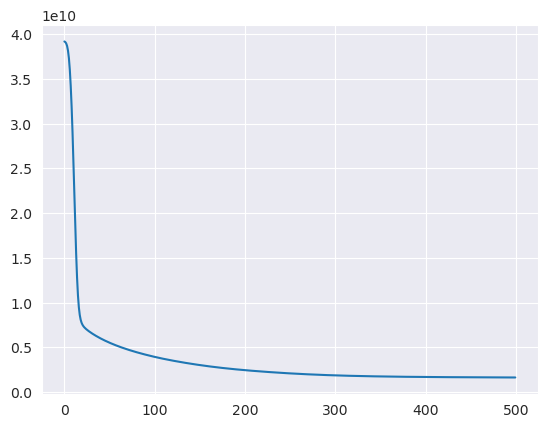

In [343]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()